In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import plotly.graph_objects as go
#import plotly.express as px
#import plotly.io as pio

In [3]:
cd=pd.read_csv(r"C:\Users\SUMIT PAL\DATASETS_for_EDA\A_B_testing\control_group.csv",sep=";")
td=test_data=pd.read_csv(r"C:\Users\SUMIT PAL\DATASETS_for_EDA\A_B_testing\test_group.csv",sep=";")

In [4]:
cd.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Renaming column names:

In [5]:
cd.columns=["Campaign Name", "Date", "Amount Spent","Number of Impressions", "Reach", "Website Clicks",
            "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [6]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign Name          30 non-null     object 
 1   Date                   30 non-null     object 
 2   Amount Spent           30 non-null     int64  
 3   Number of Impressions  29 non-null     float64
 4   Reach                  29 non-null     float64
 5   Website Clicks         29 non-null     float64
 6   Searches Received      29 non-null     float64
 7   Content Viewed         29 non-null     float64
 8   Added to Cart          29 non-null     float64
 9   Purchases              29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [7]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [8]:
td.columns=["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [9]:
Date=np.arange(1,31)
cd['Date']=Date
td['Date']=Date
cd.dtypes

Campaign Name             object
Date                       int32
Amount Spent               int64
Number of Impressions    float64
Reach                    float64
Website Clicks           float64
Searches Received        float64
Content Viewed           float64
Added to Cart            float64
Purchases                float64
dtype: object

In [10]:
cd.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [11]:
cd[cd.isnull().any(axis=1)]

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
4,Control Campaign,5,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
td.isnull().sum()                # No NULL values in test data(td)

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

## filling nan values in cd(control_data)

In [13]:
cd["Number of Impressions"].fillna(value=cd["Number of Impressions"].mean(), 
                                             inplace=True)
cd["Reach"].fillna(value=cd["Reach"].mean(), 
                             inplace=True)
cd["Website Clicks"].fillna(value=cd["Website Clicks"].mean(), 
                                      inplace=True)
cd["Searches Received"].fillna(value=cd["Searches Received"].mean(), 
                                         inplace=True)
cd["Content Viewed"].fillna(value=cd["Content Viewed"].mean(), 
                                      inplace=True)
cd["Added to Cart"].fillna(value=cd["Added to Cart"].mean(), 
                                     inplace=True)
cd["Purchases"].fillna(value=cd["Purchases"].mean(), 
                                 inplace=True)

# merging cd & td>> ab

In [14]:
ab = cd.merge(test_data,how="outer").sort_values(["Date"])
ab = ab.reset_index(drop=True)
ab.columns=["Campaign Name", "Date", "Amount Spent","Number of Impressions", "Reach", "Website Clicks",
            "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]
ab.head()


,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Control Campaign,2,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
3,Test Campaign,2,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
4,Control Campaign,3,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


In [15]:
# analysing relationship among features:

In [16]:
ab.dtypes

Campaign Name             object
Date                       int32
Amount Spent               int64
Number of Impressions    float64
Reach                    float64
Website Clicks           float64
Searches Received        float64
Content Viewed           float64
Added to Cart            float64
Purchases                float64
dtype: object

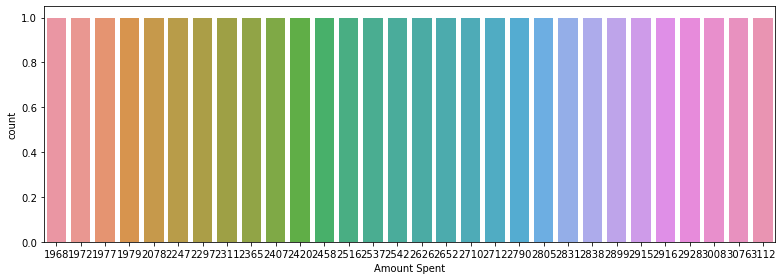

In [17]:
plt.rcParams['figure.figsize'] = (11,4)
sns.countplot(x="Amount Spent",data=td)
plt.tight_layout()

In [18]:
# .figure = px.scatter(data_frame = ab_data, 
#                     x="Number of Impressions",
#                     y="Amount Spent", 
#                     size="Amount Spent", 
#                     color= "Campaign Name", 
#                     trendline="ols")
# figure.show()

# Observations: using heatmap()

<AxesSubplot:>

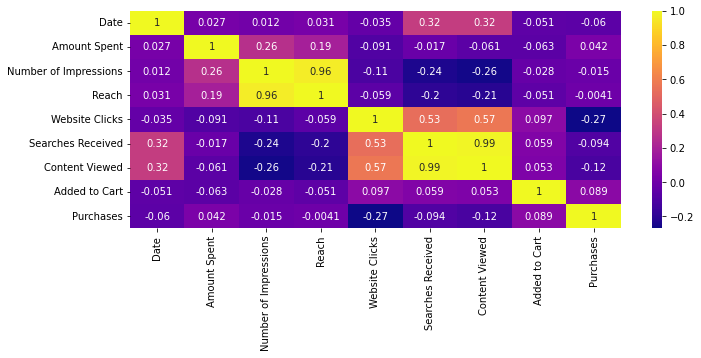

In [19]:
sns.heatmap(cd.corr(),cmap='plasma',annot=True)

# Control_data
#### Very high correlation: 2

Number of impressions & Reach

Search received & Content viewed

#### moderate low correlation: 2
website click & Search received

website clicks & Content viewed

#### very low:2
Amount & no. of impression

Amount & Reach

<AxesSubplot:>

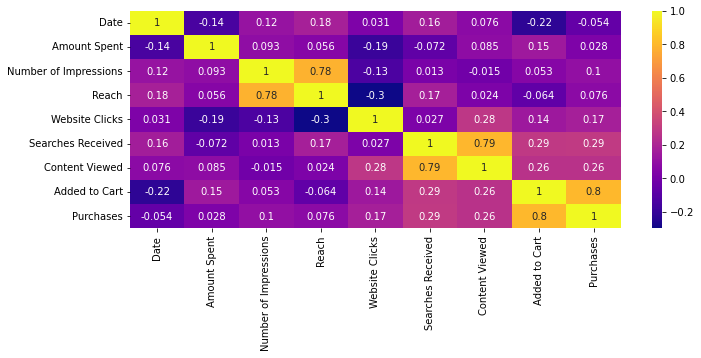

In [20]:
sns.heatmap(td.corr(),cmap='plasma',annot=True)

# Test_data
#### Very high correlation: 0

#### High correlation: 3
Added to cart & Purchases

Content Viewed & Search received

Number of Impressions & Reach

#### very low: approxiamate all other lower than 0.15 or 0.2

<AxesSubplot:>

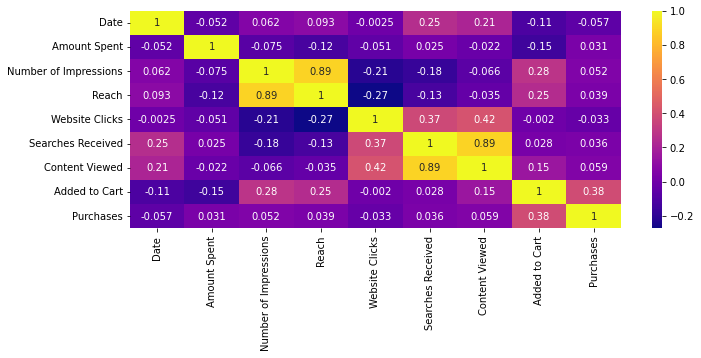

In [21]:
sns.heatmap(ab.corr(),cmap='plasma',annot=True)

# ab_data (merged_dataset)
#### Very high correlation: 0

#### High correlation: 2
Content Viewed & Search received

Number of Impressions & Reach

#### low correlation:
Purchases & added to cart

#### very low: approxiamate all other lower than 0.15 or 0.2

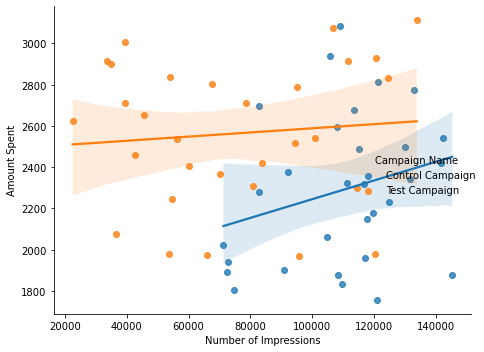

In [22]:
sns.lmplot(x='Number of Impressions',y='Amount Spent',data=ab,hue='Campaign Name')
plt.tight_layout()

### Observation:
The control campaign resulted in more impressions according to the amount spent on both campaigns. Now let’s have a look at the number of searches performed on the website from both campaigns

In [23]:
# plt.pieplot(x='Searches Received',data=ab,hue='Campaign Name')
# palette_color = sns.color_palette('dark')
# plt.pie(x='Searches Received',data=ab,colors=palette_color, autopct='%.0f%%')
# sns.countplot(x='Searches Received',hue='Campaign Name',data=ab)

In [24]:
m=ab.groupby('Campaign Name').sum()
m

,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
Campaign Name,,,,,,,,,
Control Campaign,465,68653,3.286793e+06,2.665348e+06,159623.793103,66639.310345,58313.793103,39000.0,15683.793103
Test Campaign,465,76892,2.237544e+06,1.604747e+06,180970.000000,72569.000000,55740.000000,26446.0,15637.000000


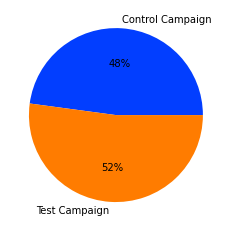

In [25]:
label=['Control Campaign','Test Campaign']
palette_color = sns.color_palette('bright')
# plt.title("SEARCHES RECEIVED")
plt.pie(x='Searches Received',data=m,colors=palette_color, labels=label,autopct='%.0f%%')
plt.show()

Test Campaign has more "Searches_Received"

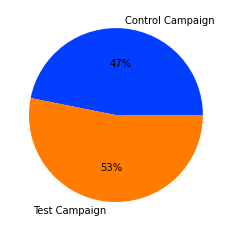

In [26]:
plt.pie(x='Website Clicks',data=m,colors=palette_color, labels=label,autopct='%.0f%%')
plt.show()

test campaign has more "WEBSITE Clicks",but only website clicks not improove SALES

In [27]:
# c=['Amount Spent','Website Clicks', 'Searches Received', 
#    'Content Viewed','Added to Cart', 'Purchases']

In [28]:
# n=1
# for i in c:
#     plt.subplot(7,1,n)
#     n=n+1
#     plt.pie(x=i,data=m,colors=palette_color, labels=label,autopct='%.0f%%')
#     print(i)
#     plt.tight_layout()

In [29]:
# plt.pie(x='Website Clicks',data=m,colors=palette_color, labels=label,autopct='%.0f%%')

In [30]:

# for i in c:
#     plt.pie(x=i,data=m,colors=palette_color, labels=label,autopct='%.0f%%')
#     print(i,"\n")
# #     plt.tight_layout()

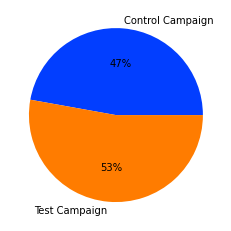

In [31]:
plt.pie(x='Amount Spent',data=m,colors=palette_color, labels=label,autopct='%.0f%%')
plt.show()

## Amount spent
amount spent on test campaign > control campaign, it means control campaign gives BETTER SALES outcome at same INVESTMENTS,............so CONTROL campaign results BETTER


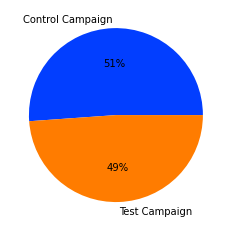

In [32]:
plt.pie(x='Content Viewed',data=m,colors=palette_color, labels=label,autopct='%.0f%%')
plt.show()

### Content Viewed

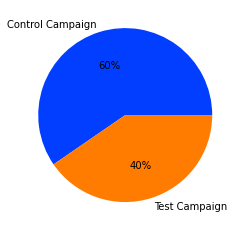

In [33]:
plt.pie(x='Added to Cart',data=m,colors=palette_color, labels=label,autopct='%.0f%%')
plt.show()

### Added to Cart
here "CONTROL CAMPAIGN" has higher percentage than TEST campaign

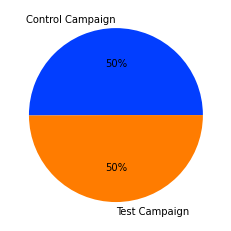

In [34]:
plt.pie(x='Purchases',data=m,colors=palette_color, labels=label,autopct='%.0f%%')
plt.show()

Amazing Observation:Purchases are equal "50%"

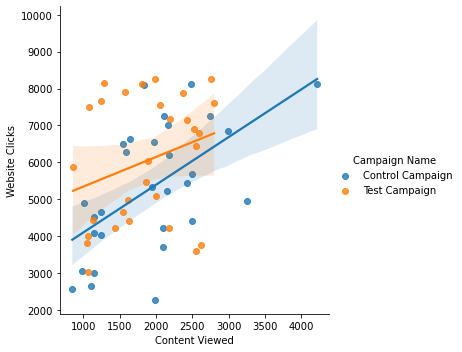

In [35]:
sns.lmplot(x="Content Viewed",y="Website Clicks",data=ab,hue="Campaign Name")
plt.show()

The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign wins!

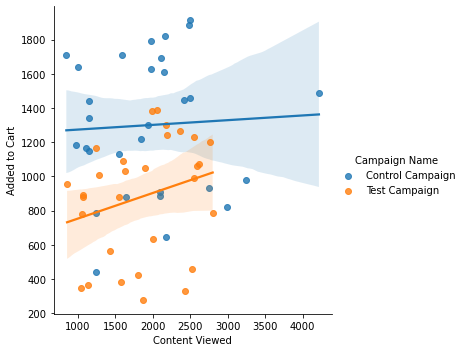

In [36]:
sns.lmplot(x="Content Viewed",y="Added to Cart",data=ab,hue="Campaign Name")
plt.show()

Again, the control campaign wins! 

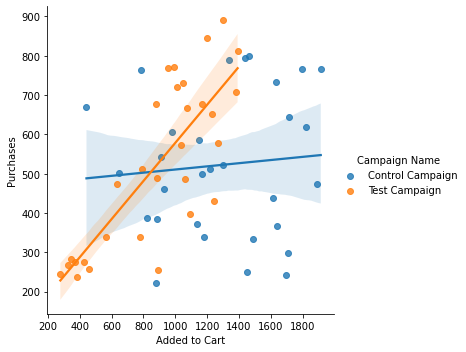

In [37]:
sns.lmplot(y="Purchases",x="Added to Cart",data=ab,hue="Campaign Name")
plt.show()

From the above A/B tests, we found that the control campaign resulted in more sales and engagement from the visitors. More products were viewed from the control campaign, resulting in more products in the cart and more sales. But the conversation rate of products in the cart is higher in the test campaign. The test campaign resulted in more sales according to the products viewed and added to the cart. And the control campaign results in more sales overall. So, the Test campaign can be used to market a specific product to a specific audience, and the Control campaign can be used to market multiple products to a wider audience.

In [38]:
m

,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
Campaign Name,,,,,,,,,
Control Campaign,465,68653,3.286793e+06,2.665348e+06,159623.793103,66639.310345,58313.793103,39000.0,15683.793103
Test Campaign,465,76892,2.237544e+06,1.604747e+06,180970.000000,72569.000000,55740.000000,26446.0,15637.000000


comparing ratio of PURCHASES/investment, CONTROL_campaign is better[Suitable for making Profit]...............


 PURCHASE/ADD_CART ratio goes with TEST_Campaign,hence suitable for SPECIFIC type of products

In [39]:
ab['P/A']=(ab['Purchases'])/(ab['Added to Cart'])

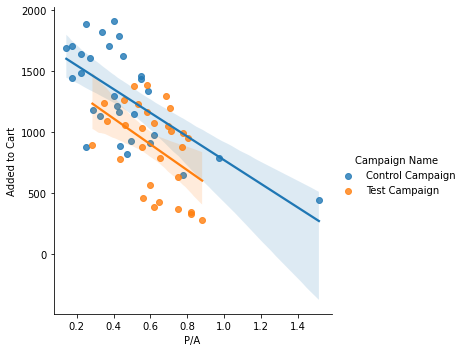

In [41]:
sns.lmplot(x="P/A",y="Added to Cart",data=ab,hue="Campaign Name")
plt.show()

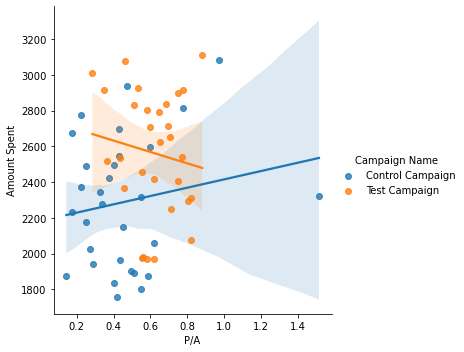

In [48]:
sns.lmplot(x="P/A",y="Amount Spent",data=ab,hue="Campaign Name")
plt.show()

Now, it shows that TEST_campaign produce some unfavourable cases, whereas Control_campaign comes with positive outcomes